BV

### Activity
Hint: use the file Data_Marketing_Customer_Analysis_Round3.csv

1. check if there are highly correlated features and drop them if there are any.
2. One Hot/Label Encoding of the categorical variables in the categoricals data frame that you created in Activity 4. ( Hint: check Dropfirst option).
3. for the first iteration, we will focus on the numericals data (numericals data frame) as our data source.
    1. X-y split (y is the target variable which is the total claim amount)
    2. (optional) remove the outliers from the numerical columns.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from IPython.display import Image
from IPython.display import HTML
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import boxcox
pd.options.display.max_rows = 100
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.model_selection import train_test_split

## Reading the dataframe

In [2]:
filename = "Data/Data_Marketing_Customer_Analysis_Round3.csv"
hk_df = pd.read_csv(filename, index_col=False)

### check if there are highly correlated features and drop them if there are any

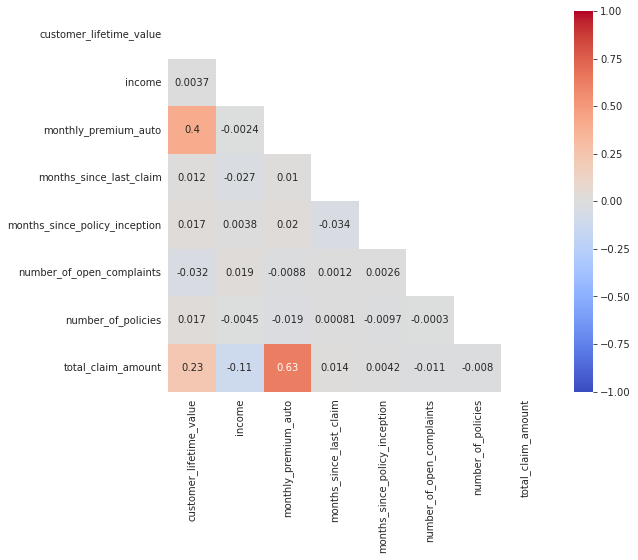

In [3]:
corr = hk_df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

### One Hot/Label Encoding of the categorical variables in the categoricals data frame that you created in Activity 4. ( Hint: check Dropfirst option).

In [4]:
cat_df= hk_df.select_dtypes("object")

cat_val=pd.get_dummies(cat_df, drop_first=True)
cat_val

,region_east,region_north west,region_west region,response_yes,coverage_extended,coverage_premium,education_college,education_doctor,education_high school or below,education_master,...,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_medsize,vehicle_size_small
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
3,0,1,0,1,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,0,0,0,0,0,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
10685,0,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
10686,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
10687,0,0,1,0,0,1,1,0,0,0,...,1,0,0,0,0,0,1,0,1,0


## Select numerical and categorical data

Get the numeric data into dataframe called `numerical` 
(You can use np.number and np.object to select the numerical data types and categorical data types respectively)

array([[<AxesSubplot:title={'center':'customer_lifetime_value'}>,
        <AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'monthly_premium_auto'}>],
       [<AxesSubplot:title={'center':'months_since_last_claim'}>,
        <AxesSubplot:title={'center':'months_since_policy_inception'}>,
        <AxesSubplot:title={'center':'number_of_open_complaints'}>],
       [<AxesSubplot:title={'center':'number_of_policies'}>,
        <AxesSubplot:title={'center':'total_claim_amount'}>,
        <AxesSubplot:>]], dtype=object)

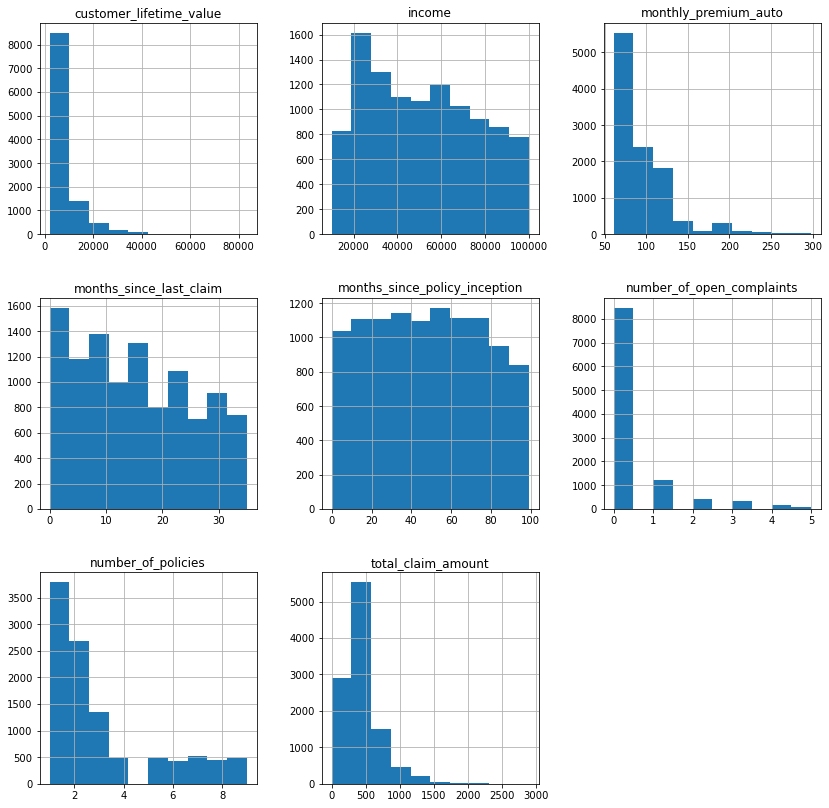

In [6]:
hk_df.hist(figsize=(14,14))

In [7]:
df_num = hk_df._get_numeric_data()
df_num = df_num.drop(['number_of_open_complaints', 'number_of_policies' ], axis=1)
df_num

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount
0,4809,48029,61,7,52,292
1,2228,92260,64,3,26,744
2,14947,22139,100,34,31,480
3,22332,49078,97,10,3,484
4,9025,23675,117,33,31,707
...,...,...,...,...,...,...
10684,15563,61541,253,12,40,1214
10685,5259,61146,65,7,68,273
10686,23893,39837,201,11,63,381
10687,11971,64195,158,0,27,618


In [8]:
colnames_numerics_only = df_num.select_dtypes(include=np.number).columns.tolist()
colnames_numerics_only

['customer_lifetime_value',
 'income',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'total_claim_amount']

### Predictive Modeling

#### X-y split (y is the target variable which is the total claim amount)

In [11]:
X=df_num.drop(['total_claim_amount'], axis=1)
y=df_num.total_claim_amount

In [13]:
#X=X._get_numeric_data()
X

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception
0,4809,48029,61,7,52
1,2228,92260,64,3,26
2,14947,22139,100,34,31
3,22332,49078,97,10,3
4,9025,23675,117,33,31
...,...,...,...,...,...
10684,15563,61541,253,12,40
10685,5259,61146,65,7,68
10686,23893,39837,201,11,63
10687,11971,64195,158,0,27


<b>Data Splitting

In [14]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=123)
X_train, X_test, y_train, y_test

(       customer_lifetime_value  income  monthly_premium_auto  \
 6608                      7271   20545                    70   
 5697                      5079   70474                    68   
 10524                     4428   58577                   110   
 397                      22332   49078                    97   
 6324                      2430   26182                    70   
 ...                        ...     ...                   ...   
 9785                      3086   73938                    76   
 7763                      5658   78834                    72   
 5218                      2434   23033                    62   
 1346                     23594   76358                    66   
 3582                     16236   68955                    74   
 
        months_since_last_claim  months_since_policy_inception  
 6608                        23                             86  
 5697                         6                             95  
 10524                 

### (optional) remove the outliers from the numerical columns.

In [15]:
df_num

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount
0,4809,48029,61,7,52,292
1,2228,92260,64,3,26,744
2,14947,22139,100,34,31,480
3,22332,49078,97,10,3,484
4,9025,23675,117,33,31,707
...,...,...,...,...,...,...
10684,15563,61541,253,12,40,1214
10685,5259,61146,65,7,68,273
10686,23893,39837,201,11,63,381
10687,11971,64195,158,0,27,618


In [16]:
df_num.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount
count,10689.000000,10689.000000,10689.000000,10689.000000,10689.000000,10689.000000
mean,8011.906727,51750.243989,93.190196,15.144073,48.100571,434.227243
std,6877.557889,24778.053035,34.413111,10.086110,27.934300,292.550878
min,1898.000000,10037.000000,61.000000,0.000000,0.000000,0.000000
25%,4014.000000,29335.000000,68.000000,6.000000,24.000000,269.000000
50%,5776.000000,50398.000000,83.000000,14.000000,48.000000,383.000000
75%,8991.000000,72131.000000,109.000000,23.000000,71.000000,547.000000
max,83325.000000,99981.000000,298.000000,35.000000,99.000000,2893.000000


To know which numerical variables we have to select to remove the outliers, we can visualize with boxplot the data and the outliers.

Identifying Outliers with Interquartile Range (IQR)
The interquartile range (IQR) is a measure of statistical dispersion and is calculated as the difference between the 75th and 25th percentiles. It is represented by the formula IQR = Q3 − Q1. The lines of code below calculate and print the interquartile range for each of the variables in the dataset.

In [17]:
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

customer_lifetime_value           4977.0
income                           42796.0
monthly_premium_auto                41.0
months_since_last_claim             17.0
months_since_policy_inception       47.0
total_claim_amount                 278.0
dtype: float64


The above output prints the IQR scores, which can be used to detect outliers. The code below generates an output with the 'True' and 'False' values. Points where the values are 'True' represent the presence of the outlier.

In [18]:
print(df_num < (Q1 - 1.5 * IQR)) |(df_num > (Q3 + 1.5 * IQR))

       customer_lifetime_value  income  monthly_premium_auto  \
0                        False   False                 False   
1                        False   False                 False   
2                        False   False                 False   
3                        False   False                 False   
4                        False   False                 False   
...                        ...     ...                   ...   
10684                    False   False                 False   
10685                    False   False                 False   
10686                    False   False                 False   
10687                    False   False                 False   
10688                    False   False                 False   

       months_since_last_claim  months_since_policy_inception  \
0                        False                          False   
1                        False                          False   
2                        False      

TypeError: Cannot perform 'ror_' with a dtyped [bool] array and scalar of type [NoneType]

Identifying Outliers with Visualization/n
way of displaying the distribution of data based on the five-number summary (minimum, first quartile (Q1), median, third quartile (Q3), and maximum). It is often used to identify data distribution and detect outliers. The line of code below plots the box plot of the numeric variable 'Loan_amount'.

<AxesSubplot:>

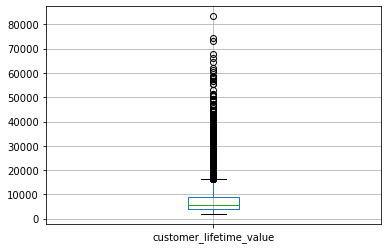

In [27]:
df_num.boxplot(column='customer_lifetime_value')

<AxesSubplot:>

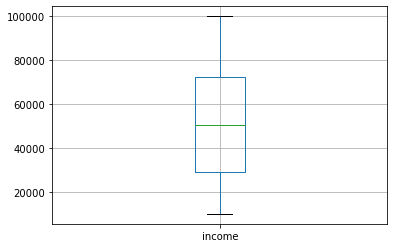

In [28]:
df_num.boxplot(column='income')

<AxesSubplot:>

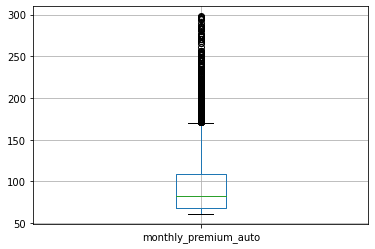

In [29]:
df_num.boxplot(column='monthly_premium_auto')

<AxesSubplot:>

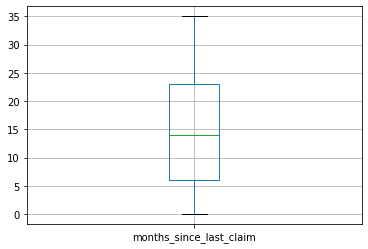

In [30]:
df_num.boxplot(column='months_since_last_claim')

<AxesSubplot:>

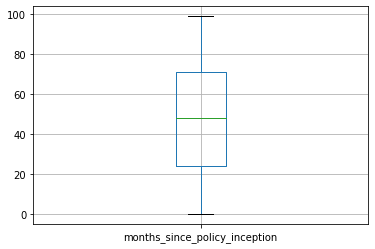

In [31]:
df_num.boxplot(column='months_since_policy_inception')

<AxesSubplot:>

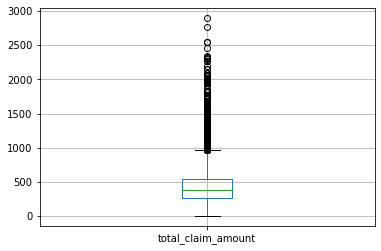

In [32]:
df_num.boxplot(column='total_claim_amount')

In [20]:
def remove_outlier_IQR(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    df_final=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
    return df_final

In [21]:
remove_outlier_IQR(df_num)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount
0,4809.0,48029,61.0,7,52,292.0
1,2228.0,92260,64.0,3,26,744.0
2,14947.0,22139,100.0,34,31,480.0
3,NaN,49078,97.0,10,3,484.0
4,9025.0,23675,117.0,33,31,707.0
...,...,...,...,...,...,...
10684,15563.0,61541,NaN,12,40,NaN
10685,5259.0,61146,65.0,7,68,273.0
10686,NaN,39837,NaN,11,63,381.0
10687,11971.0,64195,158.0,0,27,618.0


AttributeError: 'AxesSubplot' object has no attribute 'df_num'

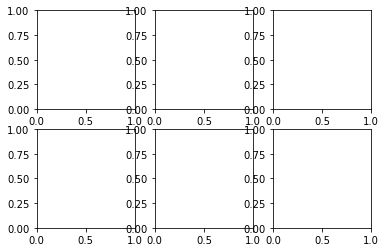

In [33]:
fig, axs = plt.subplots(2, 3)
axs[0, 0].df_num['customer_lifetime_value'].plot(kind='box', title='boxplot', showmeans=True)
axs[0, 0].set_title('Axis [0, 0]')
axs[0, 1].df_num['income'].plot(kind='box', title='boxplot', showmeans=True)
axs[0, 1].set_title('Axis [0, 1]')
axs[1, 0].df_num['monthly_premium_auto'].plot(kind='box', title='boxplot', showmeans=True)
axs[1, 0].set_title('Axis [1, 0]')
axs[1, 1].df_num['months_since_last_claim'].plot(kind='box', title='boxplot', showmeans=True)
axs[1, 1].set_title('Axis [1, 1]')
axs[2, 0].df_num['months_since_policy_inception'].plot(kind='box', title='boxplot', showmeans=True)
axs[2, 1].set_title('Axis [1, 1]')
axs[3, 0].df_num['total_claim_amount'].plot(kind='box', title='boxplot', showmeans=True)
axs[3, 1].set_title('Axis [1, 1]')
